In [2]:
import random
import os
from tqdm import tqdm
from datetime import datetime
import sys
from collections import Counter
import functools
from importlib import reload
import pickle
import copy
import re
import warnings
import utils
reload(utils)
from tqdm import tqdm
import utils_selection
reload(utils_selection)
import utils_engineering
reload(utils_engineering)

import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tabpfn import TabPFNClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV, LassoLarsCV, Lasso
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Ancestry

In [3]:
file_name = "ancestry_pyramid_llm_select_rsID"

# Generalized dataset and target attribute
target_attr = 'superpopulation_name'

# Lasso-based feature selection and ML evaluation
seeds = [0, 1, 2, 3,4,5]
shots = [10,20,40,80,160] 

#### ML Results

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    lr_results_ancestry = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="lr")
    utils_engineering.print_results(lr_results_ancestry, shots, "Logistic Regression")

Evaluating lr for 10-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating lr for 20-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating lr for 40-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating lr for 80-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating lr for 160-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results for Logistic Regression
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  10  |    0.7286    | 0.112 | 0.9031  | 0.044 | 0.6995 | 0.126 |
|  20  |    0.8038    | 0.036 | 0.9393  | 0.014 | 0.7753 | 0.036 |
|  40  |    0.8541    | 0.021 | 0.9583  | 0.012 | 0.8388 | 0.030 |
|  80  |    0.8880    | 0.016 | 0.9749  | 0.007 | 0.8840 | 0.015 |
| 160  |    0.8955    | 0.006 | 0.9796  | 0.002 | 0.8914 | 0.006 |
+------+--------------+-------+---------+-------+--------+-------+


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
rf_results_ancestry = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="rf")
utils_engineering.print_results(rf_results_ancestry, shots, "Random Forests")

Evaluating rf for 10-shot
Evaluating rf for 20-shot
Evaluating rf for 40-shot
Evaluating rf for 80-shot
Evaluating rf for 160-shot
Results for Random Forests
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  10  |    0.7472    | 0.045 | 0.9053  | 0.014 | 0.7311 | 0.044 |
|  20  |    0.8180    | 0.038 | 0.9408  | 0.012 | 0.7989 | 0.042 |
|  40  |    0.8490    | 0.014 | 0.9575  | 0.005 | 0.8365 | 0.011 |
|  80  |    0.8690    | 0.013 | 0.9720  | 0.003 | 0.8621 | 0.015 |
| 160  |    0.8878    | 0.008 | 0.9793  | 0.002 | 0.8857 | 0.009 |
+------+--------------+-------+---------+-------+--------+-------+


In [6]:
reload(utils_engineering)
xgboost_results_ancestry = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="xgboost")
utils_engineering.print_results(xgboost_results_ancestry, shots, "XGBoost")

Evaluating xgboost for 10-shot
Evaluating xgboost for 20-shot
Evaluating xgboost for 40-shot
Evaluating xgboost for 80-shot
Evaluating xgboost for 160-shot
Results for XGBoost
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  10  |    0.5445    | 0.070 | 0.8437  | 0.030 | 0.5069 | 0.068 |
|  20  |    0.7640    | 0.054 | 0.9155  | 0.024 | 0.7493 | 0.056 |
|  40  |    0.8276    | 0.017 | 0.9505  | 0.009 | 0.8199 | 0.016 |
|  80  |    0.8552    | 0.017 | 0.9647  | 0.008 | 0.8528 | 0.015 |
| 160  |    0.8746    | 0.015 | 0.9746  | 0.008 | 0.8735 | 0.014 |
+------+--------------+-------+---------+-------+--------+-------+


In [7]:
tabpfn_results_ancestry = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="tabpfn")
utils_engineering.print_results(tabpfn_results_ancestry, shots, "TabPFN")

Evaluating tabpfn for 10-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py

Evaluating tabpfn for 20-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py

Evaluating tabpfn for 40-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py

Evaluating tabpfn for 80-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py

Evaluating tabpfn for 160-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:96: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != default_target_attribute] = df.loc[:, df.columns != default_target_attribute].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py

Results for TabPFN
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  10  |    0.7544    | 0.036 | 0.3234  | 0.077 | 0.7439 | 0.037 |
|  20  |    0.7850    | 0.043 | 0.8385  | 0.032 | 0.7803 | 0.036 |
|  40  |    0.8387    | 0.016 | 0.9494  | 0.007 | 0.8329 | 0.012 |
|  80  |    0.8755    | 0.012 | 0.9672  | 0.005 | 0.8758 | 0.011 |
| 160  |    0.8966    | 0.008 | 0.9749  | 0.002 | 0.8961 | 0.009 |
+------+--------------+-------+---------+-------+--------+-------+


#### GenoLLM Results

In [8]:
reload(utils)
file_paths=[
    "logs/ancestry_pyramid_llm_select_rsID/10_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5_plus_original.pkl",
     "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5_plus_original.pkl",
      "logs/ancestry_pyramid_llm_select_rsID/40_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5_plus_original.pkl",
       "logs/ancestry_pyramid_llm_select_rsID/80_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5_plus_original.pkl",
    ]
geno_llm_plus_original_lr_results_ancestry, geno_llm_plus_original_rf_results_ancestry, geno_llm_plus_original_xgb_results_ancestry = utils.load_and_print_results(file_paths)

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  10  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8018  | 0.05 | 0.7867  | 0.05 |  0.9346  | 0.02 |
|  10  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.7797  | 0.04 | 0.7610  | 0.04 |  0.9233  | 0.01 |
|  10  | xgboost |  0.9833   | 0.04 |  0.9822  | 0.04 |  1.0000   | 0.00 |  0.6778  | 0.06 | 0.6746  | 0.05 |  0.8691  | 0.04 |
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8404  | 0.03 | 0.8323  | 0.03 |  0.9576  | 0.01 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8223  | 0.03 | 0.8101  | 0

In [119]:
reload(utils)
file_paths=[
    "logs/ancestry_pyramid_llm_select_rsID/10_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5.pkl",
     "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5.pkl",
      "logs/ancestry_pyramid_llm_select_rsID/40_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5.pkl",
       "logs/ancestry_pyramid_llm_select_rsID/80_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_5.pkl",
    ]
geno_llm_lr_results_ancestry, geno_llm_rf_results_ancestry, geno_llm_xgb_results_ancestry = utils.load_and_print_results(file_paths)

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  10  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.7858  | 0.05 | 0.7717  | 0.05 |  0.9169  | 0.03 |
|  10  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.7372  | 0.05 | 0.7199  | 0.04 |  0.9193  | 0.02 |
|  10  | xgboost |  0.9500   | 0.08 |  0.9356  | 0.10 |  0.9896   | 0.02 |  0.7117  | 0.07 | 0.6953  | 0.06 |  0.8914  | 0.02 |
|  20  |   lr    |  0.9250   | 0.07 |  0.9238  | 0.07 |  0.9943   | 0.01 |  0.8082  | 0.02 | 0.7948  | 0.03 |  0.9418  | 0.01 |
|  20  |   rf    |  0.9917   | 0.02 |  0.9915  | 0.02 |  0.9995   | 0.00 |  0.7761  | 0.03 | 0.7660  | 0

In [141]:
# Ablation three regarding serialization
reload(utils)
file_paths=[
        "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
      "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v7_q20_0_1_2_3_4_plus_original.pkl",    
      ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_two, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two, _ = utils.load_and_print_results(file_paths)
geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8343  | 0.04 | 0.8270  | 0.04 |  0.9572  | 0.01 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8227  | 0.04 | 0.8117  | 0.03 |  0.9527  | 0.01 |
|  20  | xgboost |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.7760  | 0.05 | 0.7677  | 0.06 |  0.9256  | 0.03 |
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8350  | 0.04 | 0.8275  | 0.04 |  0.9571  | 0.01 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8232  | 0.03 | 0.8115  | 0

{20: {'accuracy': [0.8514376996805112,
   0.7955271565495208,
   0.8666134185303515,
   0.7731629392971247,
   0.829073482428115],
  'f1': [0.8382769322913848,
   0.798017571856647,
   0.845128756646173,
   0.7589080865564392,
   0.8172533768462539],
  'auc': [0.9710616392725182,
   0.9483766867746853,
   0.9511237725077066,
   0.9308433368473613,
   0.9616032637656998],
  'Class African Ancestry F1-Score': [0.9609984399375975,
   0.9659442724458205,
   0.9731343283582089,
   0.9486404833836858,
   0.9662576687116564],
  'Class American Ancestry F1-Score': [0.5241935483870968,
   0.43783783783783786,
   0.4104803493449782,
   0.23684210526315788,
   0.4148148148148148],
  'Class East Asian Ancestry F1-Score': [0.8681898066783831,
   0.8962962962962963,
   0.9607843137254902,
   0.8741258741258742,
   0.9107806691449815],
  'Class European Ancestry F1-Score': [0.8829787234042553,
   0.7633262260127932,
   0.8610634648370498,
   0.6968325791855203,
   0.857707509881423],
  'Class South A

In [115]:
# Ablation four regarding open source models
reload(utils)
file_paths=[
    "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-3.5-turbo_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
    "logs/ancestry_pyramid_llm_select_rsID/20_shot_Meta-Llama-3.1-405B-Instruct-Turbo_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
        "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",    ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_two, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two, _ = utils.load_and_print_results(file_paths)


+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8347  | 0.04 | 0.8269  | 0.04 |  0.9546  | 0.01 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8254  | 0.04 | 0.8140  | 0.04 |  0.9514  | 0.01 |
|  20  | xgboost |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.7716  | 0.05 | 0.7626  | 0.06 |  0.9226  | 0.03 |
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8324  | 0.04 | 0.8255  | 0.04 |  0.9562  | 0.02 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8259  | 0.04 | 0.8151  | 0

In [134]:
# Ablation two regarding serialization
reload(utils)
file_paths=[
        "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v6_q20_0_1_2_3_4-augmented-with-genes_plus_original.pkl",
      "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v6_q20_0_1_2_3_4_plus_original.pkl",
      "logs/ancestry_pyramid_llm_select_rsID/20_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
    ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_two, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two, _ = utils.load_and_print_results(file_paths)
geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8366  | 0.04 | 0.8291  | 0.04 |  0.9571  | 0.01 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8244  | 0.03 | 0.8123  | 0.03 |  0.9530  | 0.01 |
|  20  | xgboost |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.7791  | 0.05 | 0.7705  | 0.05 |  0.9287  | 0.02 |
|  20  |   lr    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8382  | 0.04 | 0.8304  | 0.04 |  0.9568  | 0.01 |
|  20  |   rf    |  1.0000   | 0.00 |  1.0000  | 0.00 |  1.0000   | 0.00 |  0.8284  | 0.04 | 0.8170  | 0

{20: {'accuracy': [0.8594249201277955,
   0.8011182108626198,
   0.8626198083067093,
   0.7675718849840255,
   0.8226837060702875],
  'f1': [0.8458328985510536,
   0.8033668125254524,
   0.8429194647663225,
   0.7535308049483599,
   0.8128579601872218],
  'auc': [0.9706751523433665,
   0.94791107558567,
   0.9526199422126245,
   0.9312835005472255,
   0.9609569801390091],
  'Class African Ancestry F1-Score': [0.9583975346687211,
   0.9675425038639877,
   0.977645305514158,
   0.9570552147239264,
   0.9705426356589147],
  'Class American Ancestry F1-Score': [0.5241935483870968,
   0.4540540540540541,
   0.4152542372881356,
   0.24104234527687296,
   0.4028268551236749],
  'Class East Asian Ancestry F1-Score': [0.8978102189781022,
   0.9,
   0.962671905697446,
   0.8765217391304347,
   0.9064220183486239],
  'Class European Ancestry F1-Score': [0.8706293706293706,
   0.7639484978540773,
   0.8494077834179357,
   0.6561085972850679,
   0.846307385229541],
  'Class South Asian Ancestry F1-

In [9]:
feat_llm_results_ancestry = {
    10: {
        'auc': [
            0.9065,
            0.8902,
            0.8724,
            0.8832,
            0.8278
        ]
    },
    20: {
        'auc': [
            0.9496,
            0.9214,
            0.8986,
            0.9297,
            0.9404
        ]
    },
    40: {
        'auc': [
            0.9579,
            0.9331,
            0.9421,
            0.9349,
            0.9420
        ]
    },
    80: {
        'auc': [
            0.9696,
            0.9627,
            0.9589,
            0.9610,
           0.9689
        ]
    }
}



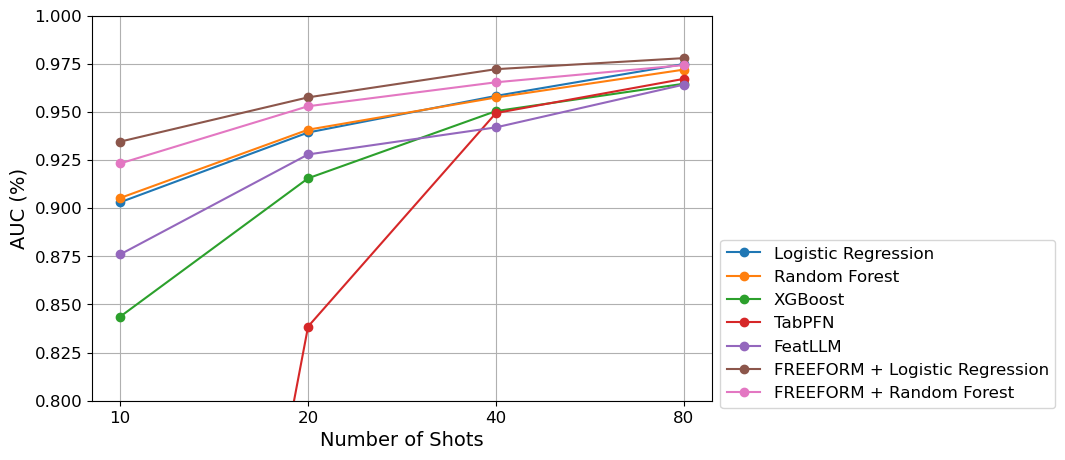

In [10]:
# Include TabLLM, FeatLLM & in-context
reload(utils)
reload(utils_engineering)
results_dict = {
    "Logistic Regression": lr_results_ancestry,
    "Random Forest": rf_results_ancestry,
    "XGBoost": xgboost_results_ancestry,
    "TabPFN": tabpfn_results_ancestry,
    "FeatLLM": feat_llm_results_ancestry,
    "FREEFORM + Logistic Regression": geno_llm_plus_original_lr_results_ancestry,
    "FREEFORM + Random Forest": geno_llm_plus_original_rf_results_ancestry,
}
shots = [10,20,40,80] 
utils_engineering.plot_results("Ancestry","agnostic",results_dict,shots,type="feature_engineering")

## Hearing Loss

In [11]:
file_name = "hearing_loss_pyramid_llm_select_modified"

# Lasso-based feature selection and ML evaluation
seeds = [0, 1, 2, 3,4]
shots = [4,8,16,32,64,128] 


#### ML Methods

In [12]:
reload(utils)
# Suppress all deprecation warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lr_results_hearing_loss = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="lr")
    utils_engineering.print_results(lr_results_hearing_loss, shots, "Logistic Regression")

Evaluating lr for 4-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating lr for 8-shot


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating lr for 16-shot
Evaluating lr for 32-shot
Evaluating lr for 64-shot
Evaluating lr for 128-shot
Results for Logistic Regression
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  4   |    0.4480    | 0.253 | 0.5000  | 0.000 | 0.3178 | 0.274 |
|  8   |    0.3030    | 0.076 | 0.4959  | 0.039 | 0.2155 | 0.149 |
|  16  |    0.5331    | 0.197 | 0.5131  | 0.073 | 0.4831 | 0.221 |
|  32  |    0.4583    | 0.183 | 0.4994  | 0.054 | 0.4139 | 0.222 |
|  64  |    0.5662    | 0.158 | 0.5480  | 0.046 | 0.5336 | 0.102 |
| 128  |    0.5444    | 0.117 | 0.5866  | 0.021 | 0.5545 | 0.106 |
+------+--------------+-------+---------+-------+--------+-------+


In [13]:

# Suppress all deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
rf_results_hearing_loss = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="rf")
utils_engineering.print_results(rf_results_hearing_loss, shots, "Random Forest")

Evaluating rf for 4-shot
Evaluating rf for 8-shot
Evaluating rf for 16-shot
Evaluating rf for 32-shot
Evaluating rf for 64-shot
Evaluating rf for 128-shot
Results for Random Forest
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  4   |    0.4113    | 0.158 | 0.5022  | 0.060 | 0.3795 | 0.163 |
|  8   |    0.3858    | 0.128 | 0.5240  | 0.059 | 0.3464 | 0.176 |
|  16  |    0.5381    | 0.094 | 0.5488  | 0.100 | 0.5450 | 0.090 |
|  32  |    0.5083    | 0.091 | 0.5599  | 0.086 | 0.5173 | 0.100 |
|  64  |    0.5795    | 0.110 | 0.6188  | 0.052 | 0.5912 | 0.099 |
| 128  |    0.5275    | 0.102 | 0.6505  | 0.016 | 0.5378 | 0.111 |
+------+--------------+-------+---------+-------+--------+-------+


In [14]:
# Suppress all deprecation warnings
reload(utils)
xgboost_results_hearing_loss = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="xgboost")
utils_engineering.print_results(xgboost_results_hearing_loss, shots, "XGBoost")

Evaluating xgboost for 4-shot
Evaluating xgboost for 8-shot
Evaluating xgboost for 16-shot
Evaluating xgboost for 32-shot
Evaluating xgboost for 64-shot
Evaluating xgboost for 128-shot
Results for XGBoost
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  4   |    0.2414    | 0.001 | 0.5000  | 0.000 | 0.0939 | 0.000 |
|  8   |    0.2414    | 0.001 | 0.5000  | 0.000 | 0.0939 | 0.000 |
|  16  |    0.2414    | 0.001 | 0.4980  | 0.012 | 0.0939 | 0.000 |
|  32  |    0.4672    | 0.172 | 0.5134  | 0.065 | 0.4348 | 0.195 |
|  64  |    0.5430    | 0.108 | 0.5537  | 0.066 | 0.5589 | 0.107 |
| 128  |    0.5308    | 0.139 | 0.6281  | 0.023 | 0.5253 | 0.152 |
+------+--------------+-------+---------+-------+--------+-------+


In [15]:
reload(utils)
tabpfn_results_hearing_loss = utils_engineering.evaluate_feature_engineering(file_name,shots,seeds,method_name="tabpfn")
utils_engineering.print_results(tabpfn_results_hearing_loss, shots, "TabPFN")

Evaluating tabpfn for 4-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

Evaluating tabpfn for 8-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

Evaluating tabpfn for 16-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

Evaluating tabpfn for 32-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

Evaluating tabpfn for 64-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

Evaluating tabpfn for 128-shot


/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(int)
/Users/jlee0/Desktop/research/AD_RAG/src/geno_RAG/src/notebooks/utils.py:88: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

Results for TabPFN
+------+--------------+-------+---------+-------+--------+-------+
| Shot | Avg Accuracy |  Std  | Avg AUC |  Std  | Avg F1 |  Std  |
+------+--------------+-------+---------+-------+--------+-------+
|  4   |    0.4791    | 0.138 | 0.4720  | 0.061 | 0.4769 | 0.136 |
|  8   |    0.4152    | 0.075 | 0.4701  | 0.052 | 0.4177 | 0.104 |
|  16  |    0.4937    | 0.138 | 0.4817  | 0.045 | 0.4921 | 0.152 |
|  32  |    0.5268    | 0.101 | 0.5106  | 0.028 | 0.5358 | 0.092 |
|  64  |    0.6205    | 0.107 | 0.5430  | 0.026 | 0.6259 | 0.081 |
| 128  |    0.5778    | 0.095 | 0.5462  | 0.050 | 0.5946 | 0.078 |
+------+--------------+-------+---------+-------+--------+-------+


#### Geno LLM Results

In [16]:
reload(utils)
file_paths=[
    "logs/hearing_loss_pyramid_llm_select_modified/4_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",
     "logs/hearing_loss_pyramid_llm_select_modified/8_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",
       "logs/hearing_loss_pyramid_llm_select_modified/32_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",
       "logs/hearing_loss_pyramid_llm_select_modified/64_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",
     "logs/hearing_loss_pyramid_llm_select_modified/128_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl"

    ]
geno_llm_plus_original_lr_results_hearing_loss, geno_llm_plus_original_rf_results_hearing_loss, _ = utils.load_and_print_results(file_paths)

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  4   |   lr    |  0.8500   | 0.12 |  0.8400  | 0.13 |  0.8750   | 0.11 |  0.4520  | 0.11 | 0.4657  | 0.13 |  0.4897  | 0.05 |
|  4   |   rf    |  0.8500   | 0.12 |  0.8400  | 0.13 |  0.8750   | 0.11 |  0.4258  | 0.13 | 0.4163  | 0.13 |  0.5006  | 0.05 |
|  4   | xgboost |  0.5000   | 0.00 |  0.3333  | 0.00 |  0.5000   | 0.00 |  0.2414  | 0.00 | 0.0939  | 0.00 |  0.5000  | 0.00 |
|  8   |   lr    |  0.8000   | 0.10 |  0.7976  | 0.10 |  0.8562   | 0.10 |  0.4285  | 0.04 | 0.4496  | 0.05 |  0.4946  | 0.04 |
|  8   |   rf    |  0.8250   | 0.06 |  0.8205  | 0.06 |  0.8938   | 0.06 |  0.3858  | 0.05 | 0.3892  | 0

In [149]:
reload(utils)
file_paths=[
    "logs/hearing_loss_pyramid_llm_select_modified/4_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4.pkl",
     "logs/hearing_loss_pyramid_llm_select_modified/8_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4.pkl",
       "logs/hearing_loss_pyramid_llm_select_modified/32_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4.pkl",
       "logs/hearing_loss_pyramid_llm_select_modified/64_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4.pkl"
    ]
geno_llm_lr_results_hearing_loss_modified, geno_llm_rf_results_hearing_loss_modified, _ = utils.load_and_print_results(file_paths)

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  4   |   lr    |  0.8500   | 0.12 |  0.8400  | 0.13 |  0.8750   | 0.11 |  0.4707  | 0.07 | 0.4924  | 0.08 |  0.5025  | 0.03 |
|  4   |   rf    |  0.8500   | 0.12 |  0.8400  | 0.13 |  0.8750   | 0.11 |  0.4081  | 0.07 | 0.4034  | 0.08 |  0.5069  | 0.02 |
|  4   | xgboost |  0.5000   | 0.00 |  0.3333  | 0.00 |  0.5000   | 0.00 |  0.2337  | 0.00 | 0.0886  | 0.00 |  0.5000  | 0.00 |
|  8   |   lr    |  0.7750   | 0.09 |  0.7697  | 0.10 |  0.8313   | 0.09 |  0.4636  | 0.06 | 0.4915  | 0.07 |  0.5154  | 0.02 |
|  8   |   rf    |  0.8250   | 0.06 |  0.8171  | 0.07 |  0.8812   | 0.06 |  0.4401  | 0.06 | 0.4567  | 0

In [28]:
geno_llm_plus_original_rf_results_hearing_loss[16]

{'accuracy': [0.6010544815465729,
  0.5957820738137083,
  0.351493848857645,
  0.335676625659051,
  0.44815465729349735],
 'f1': [0.6286584545539703,
  0.6137284174587876,
  0.34391898952912364,
  0.3016910820831795,
  0.4766749775905026],
 'auc': [0.5965630820169691,
  0.45640477340139346,
  0.49696488928743887,
  0.586095399048079,
  0.5367144926536525],
 'Class No F1-Score': [0.3641456582633053,
  0.25806451612903225,
  0.3648881239242685,
  0.38636363636363635,
  0.36947791164658633],
 'Class Yes F1-Score': [0.7093469910371318,
  0.7222222222222222,
  0.3375224416517056,
  0.27586206896551724,
  0.509375]}

In [108]:
# v5: let's get rid of the variables in which we say categorical or not
reload(utils)
file_paths=[
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",

    ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_one, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_one, _ = utils.load_and_print_results(file_paths)
geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_one

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  16  |   lr    |  0.7000   | 0.08 |  0.6871  | 0.10 |  0.7812   | 0.10 |  0.5325  | 0.10 | 0.5559  | 0.09 |  0.5200  | 0.04 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.8187   | 0.12 |  0.4657  | 0.11 | 0.4721  | 0.13 |  0.5405  | 0.05 |
|  16  | xgboost |  0.6750   | 0.08 |  0.6708  | 0.08 |  0.7484   | 0.10 |  0.4608  | 0.09 | 0.4831  | 0.10 |  0.5132  | 0.03 |
|  16  |   lr    |  0.7000   | 0.08 |  0.6850  | 0.10 |  0.7469   | 0.07 |  0.5360  | 0.10 | 0.5581  | 0.09 |  0.5076  | 0.02 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.7906   | 0.09 |  0.4664  | 0.11 | 0.4729  | 0

{16: {'accuracy': [0.6010544815465729,
   0.5957820738137083,
   0.351493848857645,
   0.335676625659051,
   0.44815465729349735],
  'f1': [0.6286584545539703,
   0.6137284174587876,
   0.34391898952912364,
   0.3016910820831795,
   0.4766749775905026],
  'auc': [0.5965630820169691,
   0.45640477340139346,
   0.49696488928743887,
   0.586095399048079,
   0.5367144926536525],
  'Class No F1-Score': [0.3641456582633053,
   0.25806451612903225,
   0.3648881239242685,
   0.38636363636363635,
   0.36947791164658633],
  'Class Yes F1-Score': [0.7093469910371318,
   0.7222222222222222,
   0.3375224416517056,
   0.27586206896551724,
   0.509375]}}

In [135]:
# Ablation two regarding serialization
reload(utils)
file_paths=[
        "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v6_q20_0_1_2_3_4-augmented-with-genes_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v6_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
    ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_two, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two, _ = utils.load_and_print_results(file_paths)
geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  16  |   lr    |  0.7000   | 0.08 |  0.6845  | 0.10 |  0.7375   | 0.09 |  0.5397  | 0.06 | 0.5620  | 0.05 |  0.5110  | 0.09 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.7906   | 0.09 |  0.5285  | 0.07 | 0.5441  | 0.07 |  0.5387  | 0.11 |
|  16  | xgboost |  0.6750   | 0.08 |  0.6670  | 0.09 |  0.7219   | 0.09 |  0.4795  | 0.10 | 0.4954  | 0.13 |  0.5167  | 0.06 |
|  16  |   lr    |  0.7000   | 0.08 |  0.6871  | 0.10 |  0.7531   | 0.07 |  0.5305  | 0.05 | 0.5553  | 0.05 |  0.5127  | 0.11 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.7906   | 0.09 |  0.4844  | 0.11 | 0.4930  | 0

{16: {'accuracy': [0.6158940397350994,
   0.5811258278145696,
   0.31788079470198677,
   0.4288079470198676,
   0.47019867549668876],
  'f1': [0.6371404478136995,
   0.5895774685628276,
   0.3093426123395817,
   0.4283178818838869,
   0.49179222903238035],
  'auc': [0.6073308608003829,
   0.3955901134400121,
   0.4286729078183885,
   0.6627534844768799,
   0.6248504516360591],
  'Class No F1-Score': [0.35911602209944754,
   0.18122977346278318,
   0.3333333333333333,
   0.4297520661157025,
   0.4139194139194139],
  'Class Yes F1-Score': [0.7257683215130024,
   0.7185761957730812,
   0.3016949152542373,
   0.42786069651741293,
   0.5166163141993958]}}

In [143]:
# Ablation three regarding serialization
reload(utils)
file_paths=[
        "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v7_q20_0_1_2_3_4_plus_original.pkl",    
      ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_two, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two, _ = utils.load_and_print_results(file_paths)
geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  16  |   lr    |  0.7000   | 0.08 |  0.6871  | 0.10 |  0.7812   | 0.10 |  0.5305  | 0.05 | 0.5553  | 0.05 |  0.5145  | 0.11 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.8187   | 0.12 |  0.4828  | 0.11 | 0.4912  | 0.12 |  0.5438  | 0.11 |
|  16  | xgboost |  0.6750   | 0.08 |  0.6708  | 0.08 |  0.7484   | 0.10 |  0.4709  | 0.08 | 0.4943  | 0.09 |  0.4970  | 0.06 |
|  16  |   lr    |  0.7000   | 0.08 |  0.6962  | 0.08 |  0.7531   | 0.07 |  0.5245  | 0.05 | 0.5520  | 0.04 |  0.5101  | 0.10 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.7906   | 0.09 |  0.5272  | 0.07 | 0.5427  | 0

{16: {'accuracy': [0.6192052980132451,
   0.5811258278145696,
   0.5331125827814569,
   0.4288079470198676,
   0.4735099337748344],
  'f1': [0.6399015299818124,
   0.5895774685628276,
   0.5593736322370075,
   0.4283178818838869,
   0.49611721640753187],
  'auc': [0.6081683316384519,
   0.3937645556306814,
   0.4283139917449303,
   0.6599419752347909,
   0.6248055871268768],
  'Class No F1-Score': [0.3611111111111111,
   0.18122977346278318,
   0.22527472527472528,
   0.4297520661157025,
   0.4132841328413284],
  'Class Yes F1-Score': [0.7287735849056604,
   0.7185761957730812,
   0.6658767772511849,
   0.42786069651741293,
   0.5225225225225225]}}

In [131]:
# Ablation four regarding open source models
reload(utils)
file_paths=[
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-3.5-turbo_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_Meta-Llama-3.1-405B-Instruct-Turbo_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v5_q20_0_1_2_3_4_plus_original.pkl",
      "logs/hearing_loss_pyramid_llm_select_modified/16_shot_gpt-4o_gpt-3.5-turbo_v4_q20_0_1_2_3_4_plus_original.pkl",

    ]
geno_llm_plus_original_lr_results_hearing_loss_modified_ablation_two, geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two, _ = utils.load_and_print_results(file_paths)
geno_llm_plus_original_rf_results_hearing_loss_modified_ablation_two

+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
| Shot |  Model  | Train Acc | Std  | Train F1 | Std  | Train AUC | Std  | Test Acc | Std  | Test F1 | Std  | Test AUC | Std  |
+------+---------+-----------+------+----------+------+-----------+------+----------+------+---------+------+----------+------+
|  16  |   lr    |  0.7000   | 0.08 |  0.6825  | 0.10 |  0.7375   | 0.07 |  0.5507  | 0.07 | 0.5678  | 0.06 |  0.5064  | 0.10 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7062  | 0.12 |  0.7906   | 0.09 |  0.5401  | 0.09 | 0.5482  | 0.08 |  0.5402  | 0.11 |
|  16  | xgboost |  0.6125   | 0.07 |  0.5751  | 0.13 |  0.6453   | 0.09 |  0.4361  | 0.11 | 0.4289  | 0.18 |  0.4878  | 0.04 |
|  16  |   lr    |  0.7000   | 0.08 |  0.6825  | 0.10 |  0.7500   | 0.07 |  0.5550  | 0.07 | 0.5724  | 0.05 |  0.5113  | 0.11 |
|  16  |   rf    |  0.7250   | 0.10 |  0.7087  | 0.12 |  0.7906   | 0.09 |  0.5268  | 0.07 | 0.5420  | 0

{16: {'accuracy': [0.6158940397350994,
   0.5811258278145696,
   0.31788079470198677,
   0.4288079470198676,
   0.47019867549668876],
  'f1': [0.6371404478136995,
   0.5895774685628276,
   0.3093426123395817,
   0.4283178818838869,
   0.49179222903238035],
  'auc': [0.6073458156367769,
   0.3957629028622944,
   0.4047601244242388,
   0.6555901178441107,
   0.6239232517796256],
  'Class No F1-Score': [0.35911602209944754,
   0.18122977346278318,
   0.3333333333333333,
   0.4297520661157025,
   0.4139194139194139],
  'Class Yes F1-Score': [0.7257683215130024,
   0.7185761957730812,
   0.3016949152542373,
   0.42786069651741293,
   0.5166163141993958]}}

In [17]:
feat_llm_results_hearing_loss = {
    4: {
        'auc': [
            0.5111,
            0.4949,
            0.4760,
            0.5094,
            0.5094
        ]
    },
    8: {
        'auc': [
            0.5317,
            0.5184,
            0.4629,
            0.5619,
            0.4701
        ]
    },
    16: {
        'auc': [
            0.5277,
            0.5474,
            0.5430,
            0.5345,
            0.5270
        ]
    },
    32: {
        'auc': [
            0.4992,
            0.5128,
            0.4868,
            0.5568,
            0.5097
        ]
    },
    64: {
        'auc': [
            0.5207,
            0.4933,
            0.5029,
            0.6610,
            0.5539
        ]
    },
    128: {
        'auc': [
            0.5367,
            0.5363,
            0.5818,
            0.5184,
            0.4820
        ]
    }
}



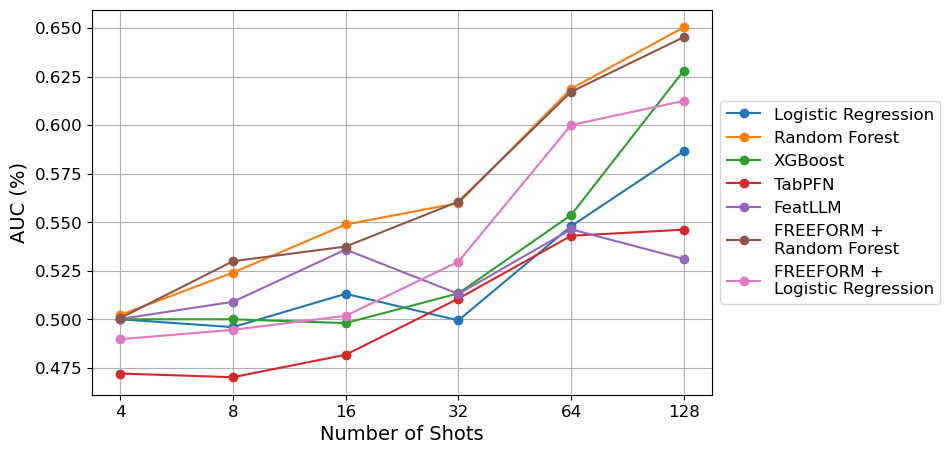

In [18]:
reload(utils_selection)
shots = [4,8,16,32,64,128]
results_dict_hearing_loss = {
    "Logistic Regression": lr_results_hearing_loss,
    "Random Forest": rf_results_hearing_loss,
    "XGBoost": xgboost_results_hearing_loss,
    "TabPFN": tabpfn_results_hearing_loss,
    "FeatLLM": feat_llm_results_hearing_loss,
        "FREEFORM + Random Forest": geno_llm_plus_original_rf_results_hearing_loss,
        "FREEFORM + Logistic Regression": geno_llm_plus_original_lr_results_hearing_loss
        
}
utils_selection.plot_results("Hearing Loss","all", results_dict_hearing_loss ,shots, type="feature_engineering")

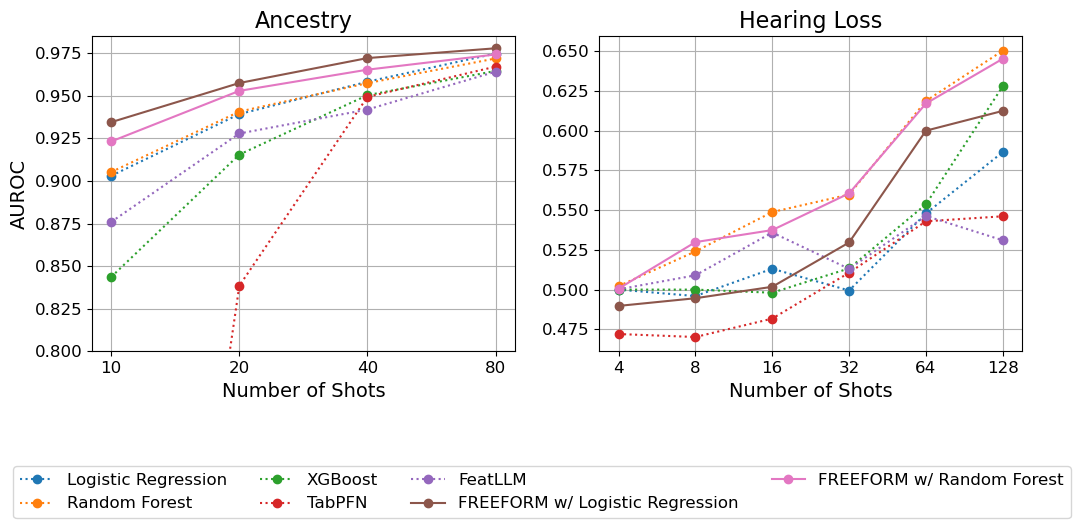

In [25]:
reload(utils_engineering)
results_dict = {
    "Logistic Regression": lr_results_ancestry,
    "Random Forest": rf_results_ancestry,
    "XGBoost": xgboost_results_ancestry,
    "TabPFN": tabpfn_results_ancestry,
    "FeatLLM": feat_llm_results_ancestry,
    "FREEFORM w/ Logistic Regression": geno_llm_plus_original_lr_results_ancestry,
    "FREEFORM w/ Random Forest": geno_llm_plus_original_rf_results_ancestry,
}
shots1 = [10,20,40,80] 

shots2 = [4,8,16,32,64,128]
results_dict_hearing_loss = {
    "Logistic Regression": lr_results_hearing_loss,
    "Random Forest": rf_results_hearing_loss,
    "XGBoost": xgboost_results_hearing_loss,
    "TabPFN": tabpfn_results_hearing_loss,
    "FeatLLM": feat_llm_results_hearing_loss,
        "FREEFORM w/ Logistic Regression": geno_llm_plus_original_lr_results_hearing_loss,
                "FREEFORM w/ Random Forest": geno_llm_plus_original_rf_results_hearing_loss,

        
}
utils_engineering.plot_results_multiple("ancestry_hearing_loss", "rf_lr", [results_dict,results_dict_hearing_loss],[shots1,shots2],["Ancestry","Hearing Loss"],plot_type="feature_engineering", save=True)

In [ ]:
# Compare GenoLLM ablations

reload(utils)
shots = [4,8,16,32]
results_dict_hearing_loss = {
        "GenoLLM + RF": geno_llm_rf_results_hearing_loss,
        "GenoLLM + LR": geno_llm_lr_results_hearing_loss,
        "GenoLLM w/ 15 + RF": geno_llm_plus_original_rf_results_hearing_loss,
        "GenoLLM w/ 15 + LR": geno_llm_plus_original_lr_results_hearing_loss,
        "Modified GenoLLM + RF": geno_llm_rf_results_hearing_loss_modified,
        "Modified GenoLLM + LR": geno_llm_lr_results_hearing_loss_modified

}
utils.plot_results("Hearing Loss",results_dict_hearing_loss ,shots)